<a href="https://colab.research.google.com/github/kakureru/ISIT/blob/main/ISiT_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
def funny(i): # проверка счастья ячейки
    def check(*args):
      g = 0
      for value in args:
        if G[i] == value:
          g += 1
      return g
    
    if G[i] == 0:
        return(True)

    good = 0
    if i == 0:
      good += check(G[1], G[N], G[N+1])
    elif i == N - 1:
      good += check(G[i - 1], G[i + N], G[i + N - 1])
    elif i == N * N - 1:
      good += check(G[i-1], G[i-N], G[i-N-1])
    elif i == N * (N - 1):
      good += check(G[i+1], G[i-N], G[i-N+1])
    elif i % N == 0 and i != 0 and i != N * (N - 1):
      good += check(G[i + 1], G[i - N], G[i + N], G[i - N + 1], G[i + N + 1])
    elif (i + 1) % N == 0 and i != N - 1 and i != N * N - 1:
      good += check(G[i - 1], G[i - N], G[i + N], G[i - N - 1], G[i + N - 1])
    elif i > 0 and i < N - 1:
      good += check(G[i-1], G[i+1], G[i+N], G[i+N+1], G[i+N-1])
    elif i > N * (N - 1) and i < N * N - 1:
      good += check(G[i-1], G[i+1], G[i-N], G[i-N+1], G[i-N-1])
    else:
      good += check(G[i-1], G[i+1], G[i-N], G[i+N], G[i-N+1], G[i+N+1], G[i-N-1], G[i+N-1])
      
    if good >= 2:
        return(True)
    else:
        return(False)

In [222]:
def checkswap(*args):
  s=[]
  for value in args:
    if not funny(value):
      s.append(value)
  return s

Everyone is happy


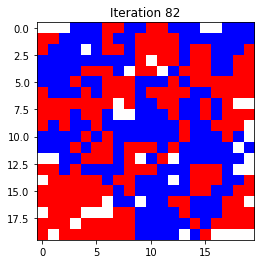

In [223]:
import random
import numpy as np
import matplotlib.pyplot as plt

N=20
max_iter=1000
color=int(0.45*N*N)
G=[0]*N*N # весь квадрат выпрямленный в линию
void=[] # список номеров пустых ячеек
sad=[] # список номеров несчастных ячеек

count=0
while count!=color:
    q=int(random.random()*N*N)
    if G[q]==0:
        G[q]=1
        count+=1

count=0
while count!=color:
    q=int(random.random()*N*N)
    if G[q]==0:
        G[q]=-1
        count+=1

for i in range(len(G)):
    if not funny(i):
        sad.append(i)
    if G[i]==0:
        void.append(i)

iter=0
while sad!=[] and iter!=max_iter:         
    iter+=1
    swwap1=int(random.random()*len(sad))
    swwap2=int(random.random()*len(void))
    swap1=sad[swwap1]
    swap2=void[swwap2]
    p=G[swap2]
    G[swap2]=G[swap1]
    G[swap1]=p
    void.pop(swwap2)
    void.append(swap1)
    sad.pop(swwap1)

    #swap1
    if swap1<N:
      if swap1!=0:
        sad.extend(checkswap(swap1-1))
      sad.extend(checkswap(swap1, swap1+1, swap1+N, swap1+N-1, swap1+N+1))
    elif swap1 >= N*(N-1):
      if swap1!=N*N-1:
        sad.extend(checkswap(swap1 + 1))
      sad.extend(checkswap(swap1 - 1, swap1, swap1 - N, swap1 - N - 1, swap1 - N + 1))
    else:
      if swap1!=N:
        sad.extend(checkswap(swap1 - N - 1))
      if swap1!=N*(N-1)-1:
        sad.extend(checkswap(swap1 + N + 1))
      sad.extend(checkswap(swap1 - 1, swap1, swap1 + 1, swap1 - N, swap1 - N + 1, swap1 + N, swap1 + N - 1))

    #swap2
    if swap2<N:
      if swap2!=0:
        sad.extend(checkswap(swap2-1))
      sad.extend(checkswap(swap2, swap2+1, swap2+N, swap2+N-1, swap2+N+1))
    elif swap2 >= N*(N-1):        
        if swap2!=N*N-1:
          sad.extend(checkswap(swap2 + 1))
        sad.extend(checkswap(swap2 - 1, swap2, swap2 - N, swap2 - N - 1, swap2 - N + 1))
    else:
      if swap2!=N:
        sad.extend(checkswap(swap2 - N - 1))
      if swap2!=N*(N-1)-1:
        sad.extend(checkswap(swap2 + N + 1))
      sad.extend(checkswap(swap2 - 1, swap2, swap2 + 1, swap2 - N, swap2 - N + 1, swap2 + N, swap2 + N - 1))  

    sadd=list(set(sad))
    sad=sadd
   
# Plot
fig, ax = plt.subplots()
ax.cla()
ax.set_title("Iteration {}".format(iter + 1))
plt.imshow(np.reshape(G, (N, N)), cmap='bwr', vmin=-1, vmax=1)

if (sad == []):
  print("Everyone is happy")